# Gymnastics National Ranking System Analysis

This Jupyter Notebook aims to discover a more fair national ranking system for NCAA gymnastics, which can be presented to the board for implementation. The current ranking system only factors in scores from competitions, considering the top six scores, with at least three scores being "away," and dropping the highest score before averaging. The proposed system aims to incorporate additional variables, such as Win/Loss records, strength of schedule, and other factors to make the ranking system more equitable and comparable to other sports like basketball and football.

Author: Rachel Baumann

Date: Monday August 7th, 20223

## Overview
In this analysis, I will explore the shortcomings of the existing national ranking system for gymnastics and propose an alternative methodology that accounts for various performance metrics. By considering factors beyond just competition scores, such as Win/Loss records, scoring difference, and strength of schedule, I aim to develop a more comprehensive and fair ranking system.

## Dataset Description
The dataset used in this analysis will contain historical performance data for the 2023 NCAA gymnastics season, including scores from competitions, Win/Loss records, scoring differences, and other relevant variables. This information was collected from RoadToNationals.com 

## Analysis Goals
The primary goals of this analysis are:

1. Recreate the Current Ranking System
2. Define a new ranking methodology that incorporates additional performance metrics, such as Win/Loss records and strength of schedule.
3. Analyze the impact of the proposed changes on the rankings.
4. Create visualizations to illustrate the differences between the current and proposed ranking systems.
5. Evaluate the fairness and comparability of the new ranking system with other popular sports ranking methods.



# Import Data

In [39]:
import pandas as pd

# Read the desired sheet from the Excel file
df = pd.read_excel("/Users/rachelbaumann/Downloads/2023 Score Sheet.xlsx")
display(df)


,Team,SCORE,Date,Opponent,Opp_Score,H/A/N2,Column3,W/L,HWIN,HLOSS,HTIE,AWIN,ALOSS,ATIE,NWIN,NLOSS,NTIE
0,Air Force,194.150,2023-01-16,San Jose State,195.250,H,-1.100,L,0,1,0,0,0,0,0,0,0
1,Air Force,193.725,2023-01-20,Centenary College,191.325,N,2.400,W,0,0,0,0,0,0,1,0,0
2,Air Force,193.725,2023-01-20,UW-Eau Claire,185.600,N,8.125,W,0,0,0,0,0,0,1,0,0
3,Air Force,193.725,2023-01-20,Texas Woman's,194.150,A,-0.425,L,0,0,0,0,1,0,0,0,0
4,Air Force,193.200,2023-01-29,Alaska,188.950,N,4.250,W,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,Yale,194.200,2023-03-18,Cornell,193.000,N,1.200,W,0,0,0,0,0,0,1,0,0
1966,Yale,194.200,2023-03-18,Pennsylvania,194.925,N,-0.725,L,0,0,0,0,0,0,0,1,0
1967,Yale,194.200,2023-03-18,Southern Conn.,192.525,N,1.675,W,0,0,0,0,0,0,1,0,0
1968,Yale,194.200,2023-03-18,West Chester,194.075,N,0.125,W,0,0,0,0,0,0,1,0,0


# Clean up data

In [40]:
# Rename columns with more accurate titles
df.rename(columns={'Column3': 'score diff'}, inplace=True)
df.rename(columns={'H/A/N2': 'LOCATION'}, inplace=True)


# Display the updated DataFrame
display(df)
df.info()

,Team,SCORE,Date,Opponent,Opp_Score,LOCATION,score diff,W/L,HWIN,HLOSS,HTIE,AWIN,ALOSS,ATIE,NWIN,NLOSS,NTIE
0,Air Force,194.150,2023-01-16,San Jose State,195.250,H,-1.100,L,0,1,0,0,0,0,0,0,0
1,Air Force,193.725,2023-01-20,Centenary College,191.325,N,2.400,W,0,0,0,0,0,0,1,0,0
2,Air Force,193.725,2023-01-20,UW-Eau Claire,185.600,N,8.125,W,0,0,0,0,0,0,1,0,0
3,Air Force,193.725,2023-01-20,Texas Woman's,194.150,A,-0.425,L,0,0,0,0,1,0,0,0,0
4,Air Force,193.200,2023-01-29,Alaska,188.950,N,4.250,W,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,Yale,194.200,2023-03-18,Cornell,193.000,N,1.200,W,0,0,0,0,0,0,1,0,0
1966,Yale,194.200,2023-03-18,Pennsylvania,194.925,N,-0.725,L,0,0,0,0,0,0,0,1,0
1967,Yale,194.200,2023-03-18,Southern Conn.,192.525,N,1.675,W,0,0,0,0,0,0,1,0,0
1968,Yale,194.200,2023-03-18,West Chester,194.075,N,0.125,W,0,0,0,0,0,0,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1970 entries, 0 to 1969
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Team        1970 non-null   object        
 1   SCORE       1970 non-null   float64       
 2   Date        1970 non-null   datetime64[ns]
 3   Opponent    1970 non-null   object        
 4   Opp_Score   1970 non-null   float64       
 5   LOCATION    1970 non-null   object        
 6   score diff  1970 non-null   float64       
 7   W/L         1970 non-null   object        
 8   HWIN        1970 non-null   int64         
 9   HLOSS       1970 non-null   int64         
 10  HTIE        1970 non-null   int64         
 11  AWIN        1970 non-null   int64         
 12  ALOSS       1970 non-null   int64         
 13  ATIE        1970 non-null   int64         
 14  NWIN        1970 non-null   int64         
 15  NLOSS       1970 non-null   int64         
 16  NTIE        1970 non-nul

# Filter Data by Week

In [14]:
#If you want to check what the Ranking would be in a certain week then edit the dates and run this code 

In [3]:
# Define the date range for week 6 (adjust the start and end dates accordingly)
week_6_start_date = pd.to_datetime('2023-01-02')
week_6_end_date = pd.to_datetime('2023-02-27')

# Filter out data for week 6
df = df[(df['Date'] >= week_6_start_date) & (df['Date'] <= week_6_end_date)]

# Build Dataframe with columns: 
- Team
- NQS
- Rank
- Total wins
- Total losses
- num of home meets
- num of away meets 
- total competitions

In [41]:
import pandas as pd

# Get a list of unique teams
unique_teams = df['Team'].unique()

# Calculate NQS and store it in a list
team_scores = []
for team in unique_teams:
     # Filter scores for the current team
    scores = df[df['Team'] == team]
    scores = scores.sort_values('SCORE', ascending=False).drop_duplicates('Date', keep='last')
    
    # Filter away or neutral scores
    away_scores = scores[scores['LOCATION'].isin(['A', 'N'])]
    
    # Select the top 3 away or neutral scores
    top_away_scores = away_scores.nlargest(3, 'SCORE')
    
    # Select the next 3 highest scores
    next_top_scores = scores[~scores.index.isin(top_away_scores.index)].nlargest(3, 'SCORE')
    
    # Concatenate the selected scores
    selected_scores = pd.concat([top_away_scores, next_top_scores])
    
    # Sort the selected scores by highest score to lowest
    selected_scores = selected_scores.sort_values('SCORE', ascending=False)
    
    # Drop the highest score
    selected_scores = selected_scores.iloc[1:]
    
    # Calculate the average of the selected scores
    average_score = selected_scores['SCORE'].mean()
    
    # Round the average score to two decimal places
    average_score = round(average_score, 3)
    
    team_scores.append((team, average_score))

# Sort teams based on average score in descending order
team_scores.sort(key=lambda x: x[1], reverse=True)

# Rank teams
ranked_teams = {team_scores[i][0]: i+1 for i in range(len(team_scores))}

# Create a dictionary of NQS, wins, losses, home meets, and away meets
team_data_dict = {
    team: {
        'Team Rank': ranked_teams[team],
        'Team': team,
        'NQS': score,
        'Wins': df.loc[df['Team'] == team, 'W/L'].apply(lambda x: 1 if x == 'W' else 0).sum(),
        'Losses': df.loc[df['Team'] == team, 'W/L'].apply(lambda x: 1 if x == 'L' else 0).sum(),
        'Home Meets': df.loc[(df['Team'] == team) & (df['LOCATION'].str.startswith('H')), 'LOCATION'].count(),
        'Away Meets': df.loc[(df['Team'] == team) & (df['LOCATION'].str.startswith('A')), 'LOCATION'].count(),
        'Total Competitions': df.loc[df['Team'] == team, 'W/L'].count()
    }
    for team, score in team_scores
}

# Create a new DataFrame using the team_data_dict
new_columns = ['Team Rank', 'NQS', 'Team', 'Wins', 'Losses', 'Home Meets', 'Away Meets', 'Total Competitions']
new_df = pd.DataFrame.from_dict(team_data_dict, orient='index', columns=new_columns)

# Sort the DataFrame by team rank
new_df.sort_values('Team Rank', inplace=True)

# Print the updated DataFrame
display(new_df)


,Team Rank,NQS,Team,Wins,Losses,Home Meets,Away Meets,Total Competitions
Oklahoma,1,198.355,Oklahoma,17,1,5,5,18
Florida,2,198.110,Florida,19,2,7,5,21
Michigan,3,198.080,Michigan,25,2,5,4,27
UCLA,4,197.950,UCLA,14,5,4,4,21
Utah,5,197.910,Utah,18,3,5,3,21
...,...,...,...,...,...,...,...,...
UW-Eau Claire,80,184.950,UW-Eau Claire,6,13,3,6,19
Winona State,81,183.830,Winona State,7,16,5,7,23
Hamline,82,183.230,Hamline,2,19,4,7,21
Greenville,83,182.535,Greenville,2,9,3,4,11


# Add WIN Percentage

Create Win percentage for each team: Number of wins ÷ total games played

In [42]:
# Calculate win percentage for each team and add it as a new column
new_df['Win Percentage'] = new_df['Wins'] / new_df['Total Competitions']

# Round the win percentage to two decimal places
new_df['Win Percentage'] = new_df['Win Percentage'].round(2)

# Print the updated DataFrame
display(new_df)


,Team Rank,NQS,Team,Wins,Losses,Home Meets,Away Meets,Total Competitions,Win Percentage
Oklahoma,1,198.355,Oklahoma,17,1,5,5,18,0.94
Florida,2,198.110,Florida,19,2,7,5,21,0.90
Michigan,3,198.080,Michigan,25,2,5,4,27,0.93
UCLA,4,197.950,UCLA,14,5,4,4,21,0.67
Utah,5,197.910,Utah,18,3,5,3,21,0.86
...,...,...,...,...,...,...,...,...,...
UW-Eau Claire,80,184.950,UW-Eau Claire,6,13,3,6,19,0.32
Winona State,81,183.830,Winona State,7,16,5,7,23,0.30
Hamline,82,183.230,Hamline,2,19,4,7,21,0.10
Greenville,83,182.535,Greenville,2,9,3,4,11,0.18


# Add Ajusted WIN Percentage

Create adjusted win percentage for each team using weighted value based on location and result:

+1.4 AWIN, +1.0 NWIN, +0.6 HWIN -0.6 AWIN, -1.0 NWIN, -1.4 HWIN

In [43]:
# Define the weights
win_weights = {
    'AWIN': 1.4,
    'HWIN': 0.6,
    'HLOSS': -1.4,
    'ALOSS': -0.6,
    'NLOSS': -1.0,
    'NWIN': 1.0,
}

# Function to calculate adjusted win percentage
def calculate_adjusted_win_percentage(row):
    adjusted_wins = (
        row['Wins'] * (win_weights['AWIN'] + win_weights['NWIN'] + win_weights['HWIN']) +
        row['Losses'] * (win_weights['ALOSS'] + win_weights['NLOSS'] + win_weights['HLOSS']) +
        row['Home Meets'] * win_weights['HWIN'] +
        row['Away Meets'] * win_weights['AWIN']
    )
    total_weight = (
        row['Wins'] + row['Losses'] + row['Home Meets'] + row['Away Meets']
    )
    if total_weight == 0:
        return 0
    return adjusted_wins / total_weight

# Calculate the adjusted win percentage for each team
new_df['Adjusted Win Percentage'] = new_df.apply(calculate_adjusted_win_percentage, axis=1)

# Round the adjusted win percentage to two decimal places
new_df['Adjusted Win Percentage'] = new_df['Adjusted Win Percentage'].round(2)

# Print the updated DataFrame
display(new_df)


,Team Rank,NQS,Team,Wins,Losses,Home Meets,Away Meets,Total Competitions,Win Percentage,Adjusted Win Percentage
Oklahoma,1,198.355,Oklahoma,17,1,5,5,18,0.94,2.07
Florida,2,198.110,Florida,19,2,7,5,21,0.90,1.88
Michigan,3,198.080,Michigan,25,2,5,4,27,0.93,2.16
UCLA,4,197.950,UCLA,14,5,4,4,21,0.67,1.30
Utah,5,197.910,Utah,18,3,5,3,21,0.86,1.80
...,...,...,...,...,...,...,...,...,...,...
UW-Eau Claire,80,184.950,UW-Eau Claire,6,13,3,6,19,0.32,-0.39
Winona State,81,183.830,Winona State,7,16,5,7,23,0.30,-0.41
Hamline,82,183.230,Hamline,2,19,4,7,21,0.10,-1.21
Greenville,83,182.535,Greenville,2,9,3,4,11,0.18,-0.76


# Scoring Margin

Create column using how much the team won by in each competition added up to get total scoring margin. 

In [44]:
# Calculate the scoring margin for each team 
scoring_margin_df = df.groupby('Team')['score diff'].sum().reset_index()
scoring_margin_df.rename(columns={'score diff': 'Scoring Margin'}, inplace=True)

# Merge the scoring margin information with the new_df DataFrame
new_df = pd.merge(new_df, scoring_margin_df, on='Team')

# Print the updated DataFrame with the Scoring Margin column
display(new_df)


,Team Rank,NQS,Team,Wins,Losses,Home Meets,Away Meets,Total Competitions,Win Percentage,Adjusted Win Percentage,Scoring Margin
0,1,198.355,Oklahoma,17,1,5,5,18,0.94,2.07,25.250
1,2,198.110,Florida,19,2,7,5,21,0.90,1.88,30.050
2,3,198.080,Michigan,25,2,5,4,27,0.93,2.16,57.850
3,4,197.950,UCLA,14,5,4,4,21,0.67,1.30,19.325
4,5,197.910,Utah,18,3,5,3,21,0.86,1.80,22.100
...,...,...,...,...,...,...,...,...,...,...,...
79,80,184.950,UW-Eau Claire,6,13,3,6,19,0.32,-0.39,-68.475
80,81,183.830,Winona State,7,16,5,7,23,0.30,-0.41,-69.200
81,82,183.230,Hamline,2,19,4,7,21,0.10,-1.21,-96.750
82,83,182.535,Greenville,2,9,3,4,11,0.18,-0.76,-102.350


# Team Value Index

Rewarding teams for beating other teams using opponent rank. 
- A team gets rewarded for beating a higher ranked team. 
- A team may lose points for losing to a lower ranked team. 

# Insert Team Rank and Opponent Rank into Df

The Team Value Index will be calulated per competition, whereas we have been using calculations on the df per team. 

This TVI value requires the information: Team Rank and Opponent Rank

In [45]:
# Create a dictionary to store the team name and corresponding team rank
team_rank_dict = {}
for index, row in new_df.iterrows():
    team_name = row['Team']
    team_rank = row['Team Rank']
    team_rank_dict[team_name] = team_rank

# Add a column for opponent rank
df['Opponent Rank'] = df['Opponent'].apply(lambda x: team_rank_dict.get(x))
df['Opponent Rank'] = df['Opponent Rank'].fillna(0)
df['Opponent Rank'] = df['Opponent Rank'].astype('int32')

# Move the Opponent Rank column to the end
opponent_rank_col = df.pop('Opponent Rank')

# Insert the Opponent Rank column after the Opponent column
df.insert(4, 'Opponent Rank', opponent_rank_col)

# Add a column for team rank
df['Team Rank'] = df['Team'].apply(lambda x: team_rank_dict.get(x))

df['Team Rank'] = df['Team Rank'].fillna(0)
df['Team Rank'] = df['Team Rank'].astype('int32')

# Move the team Rank column to the end
team_rank_col = df.pop('Team Rank')

# Insert the Team Rank column after the Team column
df.insert(1, 'Team Rank', team_rank_col)


# Print to DataFrame
display(df)

,Team,Team Rank,SCORE,Date,Opponent,Opponent Rank,Opp_Score,LOCATION,score diff,W/L,HWIN,HLOSS,HTIE,AWIN,ALOSS,ATIE,NWIN,NLOSS,NTIE
0,Air Force,58,194.150,2023-01-16,San Jose State,37,195.250,H,-1.100,L,0,1,0,0,0,0,0,0,0
1,Air Force,58,193.725,2023-01-20,Centenary College,73,191.325,N,2.400,W,0,0,0,0,0,0,1,0,0
2,Air Force,58,193.725,2023-01-20,UW-Eau Claire,80,185.600,N,8.125,W,0,0,0,0,0,0,1,0,0
3,Air Force,58,193.725,2023-01-20,Texas Woman's,54,194.150,A,-0.425,L,0,0,0,0,1,0,0,0,0
4,Air Force,58,193.200,2023-01-29,Alaska,69,188.950,N,4.250,W,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,Yale,61,194.200,2023-03-18,Cornell,63,193.000,N,1.200,W,0,0,0,0,0,0,1,0,0
1966,Yale,61,194.200,2023-03-18,Pennsylvania,56,194.925,N,-0.725,L,0,0,0,0,0,0,0,1,0
1967,Yale,61,194.200,2023-03-18,Southern Conn.,62,192.525,N,1.675,W,0,0,0,0,0,0,1,0,0
1968,Yale,61,194.200,2023-03-18,West Chester,60,194.075,N,0.125,W,0,0,0,0,0,0,1,0,0


## Calculation for Team Value Index

Ideal Team Value Index will reward teams for beating other good teams and penalize teams for losing to much lower ranked teams. 

In [46]:
def calculate_team_value_index(row):
    team_rank = row['Team Rank']
    opponent_rank = row['Opponent Rank']
    
    if row['W/L'] == 'W' and team_rank > opponent_rank:
        # Reward for beating a higher-ranked opponent
        value = (team_rank - opponent_rank) * 1.4
    elif row['W/L'] == 'W' and team_rank < opponent_rank:
        # Reward for beating a lower-ranked opponent
        value = (opponent_rank - team_rank) * 0.6
    elif row['W/L'] == 'L' and team_rank < opponent_rank:
        # Penalty for losing to a lower-ranked opponent
        value = (opponent_rank - team_rank) * -1.4
    elif row['W/L'] == 'L' and team_rank > opponent_rank:
        # Penalty for losing to a higher-ranked opponent
        value = (team_rank - opponent_rank) * -0.6
    else:
        value = 0

    return value

# Calculate the Team Value Index column
df['Team Value Index'] = df.apply(calculate_team_value_index, axis=1)

# Print the df DataFrame
display(df)


,Team,Team Rank,SCORE,Date,Opponent,Opponent Rank,Opp_Score,LOCATION,score diff,W/L,HWIN,HLOSS,HTIE,AWIN,ALOSS,ATIE,NWIN,NLOSS,NTIE,Team Value Index
0,Air Force,58,194.150,2023-01-16,San Jose State,37,195.250,H,-1.100,L,0,1,0,0,0,0,0,0,0,-12.6
1,Air Force,58,193.725,2023-01-20,Centenary College,73,191.325,N,2.400,W,0,0,0,0,0,0,1,0,0,9.0
2,Air Force,58,193.725,2023-01-20,UW-Eau Claire,80,185.600,N,8.125,W,0,0,0,0,0,0,1,0,0,13.2
3,Air Force,58,193.725,2023-01-20,Texas Woman's,54,194.150,A,-0.425,L,0,0,0,0,1,0,0,0,0,-2.4
4,Air Force,58,193.200,2023-01-29,Alaska,69,188.950,N,4.250,W,0,0,0,0,0,0,1,0,0,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,Yale,61,194.200,2023-03-18,Cornell,63,193.000,N,1.200,W,0,0,0,0,0,0,1,0,0,1.2
1966,Yale,61,194.200,2023-03-18,Pennsylvania,56,194.925,N,-0.725,L,0,0,0,0,0,0,0,1,0,-3.0
1967,Yale,61,194.200,2023-03-18,Southern Conn.,62,192.525,N,1.675,W,0,0,0,0,0,0,1,0,0,0.6
1968,Yale,61,194.200,2023-03-18,West Chester,60,194.075,N,0.125,W,0,0,0,0,0,0,1,0,0,1.4


### Above Team Value Index is more accurate but still does not represent the reward that the teams should get: 
For Example: Air Force should lose less points for losing to San Jose State than to Texas Woman's


## Average the TVI over all competitions for each team. 

In [47]:

# Calculate the average team value index for each team
team_value_index_average = df.groupby('Team')['Team Value Index'].mean()

# Add the average team value index to the new_df DataFrame
for team, value in team_value_index_average.items():
    new_df.loc[new_df['Team'] == team, 'Team Value Index'] = value

# Print the new_df DataFrame
display(new_df)

,Team Rank,NQS,Team,Wins,Losses,Home Meets,Away Meets,Total Competitions,Win Percentage,Adjusted Win Percentage,Scoring Margin,Team Value Index
0,1,198.355,Oklahoma,17,1,5,5,18,0.94,2.07,25.250,9.877778
1,2,198.110,Florida,19,2,7,5,21,0.90,1.88,30.050,9.733333
2,3,198.080,Michigan,25,2,5,4,27,0.93,2.16,57.850,12.896296
3,4,197.950,UCLA,14,5,4,4,21,0.67,1.30,19.325,6.847619
4,5,197.910,Utah,18,3,5,3,21,0.86,1.80,22.100,7.123810
...,...,...,...,...,...,...,...,...,...,...,...,...
79,80,184.950,UW-Eau Claire,6,13,3,6,19,0.32,-0.39,-68.475,-6.252632
80,81,183.830,Winona State,7,16,5,7,23,0.30,-0.41,-69.200,2.939130
81,82,183.230,Hamline,2,19,4,7,21,0.10,-1.21,-96.750,0.047619
82,83,182.535,Greenville,2,9,3,4,11,0.18,-0.76,-102.350,-18.163636


# Create Efficiency Score
 
Using sum of Win Percentage, Adjusted Win Percentage, and Scoring Margin, then average across all competitions. 

In [30]:

# Calculate the total 'Team Efficiency' and assign it to the DataFrame
new_df['Team Efficiency'] = new_df['Win Percentage'] + new_df['Adjusted Win Percentage'] + new_df['Scoring Margin'] / new_df['Total Competitions']
display(new_df)

,Team Rank,NQS,Team,Wins,Losses,Home Meets,Away Meets,Total Competitions,Win Percentage,Adjusted Win Percentage,Scoring Margin,Team Value Index,Team Efficiency
0,1,198.355,Oklahoma,17,1,5,5,18,0.94,2.07,25.250,8.027778,4.412778
1,2,198.110,Florida,19,2,7,5,21,0.90,1.88,30.050,7.809524,4.210952
2,3,198.080,Michigan,25,2,5,4,27,0.93,2.16,57.850,10.481481,5.232593
3,4,197.950,UCLA,14,5,4,4,21,0.67,1.30,19.325,5.023810,2.890238
4,5,197.910,Utah,18,3,5,3,21,0.86,1.80,22.100,4.904762,3.712381
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,80,184.950,UW-Eau Claire,6,13,3,6,19,0.32,-0.39,-68.475,5.894737,-3.673947
80,81,183.830,Winona State,7,16,5,7,23,0.30,-0.41,-69.200,27.478261,-3.118696
81,82,183.230,Hamline,2,19,4,7,21,0.10,-1.21,-96.750,15.928571,-5.717143
82,83,182.535,Greenville,2,9,3,4,11,0.18,-0.76,-102.350,15.318182,-9.884545


# Test Weights and Add New Rank Column

# Adding Rank for 80/20 Weight

In [31]:
new_df1 = new_df
def calculate_weighted_score(row):
    efficiency = row['Team Efficiency']
    team_value_index = row['Team Value Index']
    NQS = row['NQS']
    total_competitions = row['Total Competitions']

    weights = {
        'Team Efficiency': 0.2,
        'Team Value Index': 0.00, #not accurate enough yet to include
        'NQS': 0.8, 
    }

    weighted_score = (efficiency * weights['Team Efficiency']) + (team_value_index * weights['Team Value Index'])+ (NQS * weights['NQS'])  
   # weighted_score = weighted_score /total_competitions
    return weighted_score

# Calculate the weighted score for each team
weighted_score_list = []
for index, row in new_df1.iterrows():
    weighted_score = calculate_weighted_score(row)
    weighted_score_list.append(weighted_score)

# Add the weighted score column to the new_df DataFrame
new_df1['Weighted Score 80/20'] = weighted_score_list

# Sort the new_df DataFrame by weighted score descending
new_df1 = new_df1.sort_values(by='Weighted Score 80/20', ascending=False)

# Create a new column called `New Rank`
new_df1['New Rank 80/20'] = range(1, len(new_df1) + 1)

# Move the `New Rank` column to the second spot
new_column_order = ['Team', 'Team Rank', 'New Rank 80/20', 'NQS', 'Wins', 'Losses', 'Home Meets', 'Away Meets', 'Total Competitions', 'Win Percentage', 'Adjusted Win Percentage', 'Scoring Margin', 'Team Value Index', 'Weighted Score 80/20', 'Team Efficiency']
new_df1 = new_df1[new_column_order]

# Print the new_df DataFrame
new_df1.head(36)



,Team,Team Rank,New Rank 80/20,NQS,Wins,Losses,Home Meets,Away Meets,Total Competitions,Win Percentage,Adjusted Win Percentage,Scoring Margin,Team Value Index,Weighted Score 80/20,Team Efficiency
0,Oklahoma,1,1,198.355,17,1,5,5,18,0.94,2.07,25.250,8.027778,159.566556,4.412778
2,Michigan,3,2,198.080,25,2,5,4,27,0.93,2.16,57.850,10.481481,159.510519,5.232593
1,Florida,2,3,198.110,19,2,7,5,21,0.90,1.88,30.050,7.809524,159.330190,4.210952
4,Utah,5,4,197.910,18,3,5,3,21,0.86,1.80,22.100,4.904762,159.070476,3.712381
6,California,7,5,197.825,22,4,9,3,28,0.79,1.67,36.375,7.892857,159.011821,3.759107
3,UCLA,4,6,197.950,14,5,4,4,21,0.67,1.30,19.325,5.023810,158.938048,2.890238
12,Denver,13,7,197.445,17,4,8,6,21,0.81,1.49,48.800,15.642857,158.880762,4.623810
9,Michigan State,10,8,197.595,22,3,5,8,25,0.88,1.87,30.425,8.100000,158.869400,3.967000
8,Kentucky,9,9,197.710,14,6,5,5,20,0.70,1.13,31.275,4.375000,158.846750,3.393750
5,LSU,6,10,197.840,13,7,5,5,20,0.65,0.93,8.825,1.125000,158.676250,2.021250


# Adding Rank for 90/10 Weight

In [32]:
new_df2 = new_df1
def calculate_weighted_score(row):
    efficiency = row['Team Efficiency']
    team_value_index = row['Team Value Index']
    NQS = row['NQS']
    total_competitions = row['Total Competitions']

    weights = {
        'Team Efficiency': 0.1,
        'Team Value Index': 0.00, #not accurate enough yet to include
        'NQS': 0.9, 
    }

    weighted_score = (efficiency * weights['Team Efficiency']) + (team_value_index * weights['Team Value Index'])+ (NQS * weights['NQS'])  
   # weighted_score = weighted_score /total_competitions
    return weighted_score

# Calculate the weighted score for each team
weighted_score_list = []
for index, row in new_df2.iterrows():
    weighted_score = calculate_weighted_score(row)
    weighted_score_list.append(weighted_score)

# Add the weighted score column to the new_df DataFrame
new_df2['Weighted Score 90/10'] = weighted_score_list

# Sort the new_df DataFrame by weighted score descending
new_df2 = new_df2.sort_values(by='Weighted Score 90/10', ascending=False)

# Create a new column called `New Rank`
new_df2['New Rank 90/10'] = range(1, len(new_df2) + 1)

# Move the `New Rank` column to the second spot
new_column_order = ['Team', 'Team Rank', 'New Rank 90/10', 'New Rank 80/20', 'NQS', 'Wins', 'Losses', 'Home Meets', 'Away Meets', 'Total Competitions', 'Win Percentage', 'Adjusted Win Percentage', 'Scoring Margin', 'Team Value Index', 'Team Efficiency' ]
new_df2 = new_df2[new_column_order]

# Print the new_df DataFrame
new_df2.head(36)



,Team,Team Rank,New Rank 90/10,New Rank 80/20,NQS,Wins,Losses,Home Meets,Away Meets,Total Competitions,Win Percentage,Adjusted Win Percentage,Scoring Margin,Team Value Index,Team Efficiency
0,Oklahoma,1,1,1,198.355,17,1,5,5,18,0.94,2.07,25.250,8.027778,4.412778
2,Michigan,3,2,2,198.080,25,2,5,4,27,0.93,2.16,57.850,10.481481,5.232593
1,Florida,2,3,3,198.110,19,2,7,5,21,0.90,1.88,30.050,7.809524,4.210952
4,Utah,5,4,4,197.910,18,3,5,3,21,0.86,1.80,22.100,4.904762,3.712381
3,UCLA,4,5,6,197.950,14,5,4,4,21,0.67,1.30,19.325,5.023810,2.890238
6,California,7,6,5,197.825,22,4,9,3,28,0.79,1.67,36.375,7.892857,3.759107
8,Kentucky,9,7,9,197.710,14,6,5,5,20,0.70,1.13,31.275,4.375000,3.393750
5,LSU,6,8,10,197.840,13,7,5,5,20,0.65,0.93,8.825,1.125000,2.021250
9,Michigan State,10,9,8,197.595,22,3,5,8,25,0.88,1.87,30.425,8.100000,3.967000
7,Alabama,8,10,11,197.720,13,6,5,4,19,0.68,1.06,8.500,2.552632,2.187368


# Adding Rank for 70/30 Weight

In [33]:
new_df3 = new_df2
def calculate_weighted_score(row):
    efficiency = row['Team Efficiency']
    team_value_index = row['Team Value Index']
    NQS = row['NQS']
    total_competitions = row['Total Competitions']

    weights = {
        'Team Efficiency': 0.3,
        'Team Value Index': 0.00, #not accurate enough yet to include
        'NQS': 0.7, 
    }

    weighted_score = (efficiency * weights['Team Efficiency']) + (team_value_index * weights['Team Value Index'])+ (NQS * weights['NQS'])  
   # weighted_score = weighted_score /total_competitions
    return weighted_score

# Calculate the weighted score for each team
weighted_score_list = []
for index, row in new_df3.iterrows():
    weighted_score = calculate_weighted_score(row)
    weighted_score_list.append(weighted_score)

# Add the weighted score column to the new_df DataFrame
new_df3['Weighted Score 70/30'] = weighted_score_list

# Sort the new_df DataFrame by weighted score descending
new_df3 = new_df3.sort_values(by='Weighted Score 70/30', ascending=False)

# Create a new column called `New Rank`
new_df3['New Rank 70/30'] = range(1, len(new_df3) + 1)

# Move the `New Rank` column to the second spot
new_column_order = ['Team', 'Team Rank', 'New Rank 90/10', 'New Rank 80/20', 'New Rank 70/30',
                    'NQS', 'Wins', 'Losses', 'Home Meets', 'Away Meets', 'Total Competitions', 
                    'Win Percentage', 'Adjusted Win Percentage', 'Scoring Margin', 'Team Value Index', 'Team Efficiency' ]
new_df3 = new_df3[new_column_order]

# Print the new_df DataFrame
new_df3.head(36)



,Team,Team Rank,New Rank 90/10,New Rank 80/20,New Rank 70/30,NQS,Wins,Losses,Home Meets,Away Meets,Total Competitions,Win Percentage,Adjusted Win Percentage,Scoring Margin,Team Value Index,Team Efficiency
2,Michigan,3,2,2,1,198.080,25,2,5,4,27,0.93,2.16,57.850,10.481481,5.232593
0,Oklahoma,1,1,1,2,198.355,17,1,5,5,18,0.94,2.07,25.250,8.027778,4.412778
1,Florida,2,3,3,3,198.110,19,2,7,5,21,0.90,1.88,30.050,7.809524,4.210952
4,Utah,5,4,4,4,197.910,18,3,5,3,21,0.86,1.80,22.100,4.904762,3.712381
6,California,7,6,5,5,197.825,22,4,9,3,28,0.79,1.67,36.375,7.892857,3.759107
12,Denver,13,11,7,6,197.445,17,4,8,6,21,0.81,1.49,48.800,15.642857,4.623810
9,Michigan State,10,9,8,7,197.595,22,3,5,8,25,0.88,1.87,30.425,8.100000,3.967000
3,UCLA,4,5,6,8,197.950,14,5,4,4,21,0.67,1.30,19.325,5.023810,2.890238
8,Kentucky,9,7,9,9,197.710,14,6,5,5,20,0.70,1.13,31.275,4.375000,3.393750
5,LSU,6,8,10,10,197.840,13,7,5,5,20,0.65,0.93,8.825,1.125000,2.021250


# Adding Rank for 60/40 Weight

In [34]:
new_df4 = new_df3
def calculate_weighted_score(row):
    efficiency = row['Team Efficiency']
    team_value_index = row['Team Value Index']
    NQS = row['NQS']
    total_competitions = row['Total Competitions']

    weights = {
        'Team Efficiency': 0.4,
        'Team Value Index': 0.00, #not accurate enough yet to include
        'NQS': 0.6, 
    }

    weighted_score = (efficiency * weights['Team Efficiency']) + (team_value_index * weights['Team Value Index'])+ (NQS * weights['NQS'])  
   # weighted_score = weighted_score /total_competitions
    return weighted_score

# Calculate the weighted score for each team
weighted_score_list = []
for index, row in new_df4.iterrows():
    weighted_score = calculate_weighted_score(row)
    weighted_score_list.append(weighted_score)

# Add the weighted score column to the new_df DataFrame
new_df4['Weighted Score 60/40'] = weighted_score_list

# Sort the new_df DataFrame by weighted score descending
new_df4 = new_df4.sort_values(by='Weighted Score 60/40', ascending=False)

# Create a new column called `New Rank`
new_df4['New Rank 60/40'] = range(1, len(new_df4) + 1)

# Move the `New Rank` column to the second spot
new_column_order = ['Team', 'Team Rank', 'New Rank 90/10', 'New Rank 80/20', 'New Rank 70/30','New Rank 60/40',
                    'NQS', 'Wins', 'Losses', 'Home Meets', 'Away Meets', 'Total Competitions', 
                    'Win Percentage', 'Adjusted Win Percentage', 'Scoring Margin', 'Team Value Index', 'Team Efficiency' ]
new_df4 = new_df4[new_column_order]

# Print the new_df DataFrame
new_df4.head(36)



,Team,Team Rank,New Rank 90/10,New Rank 80/20,New Rank 70/30,New Rank 60/40,NQS,Wins,Losses,Home Meets,Away Meets,Total Competitions,Win Percentage,Adjusted Win Percentage,Scoring Margin,Team Value Index,Team Efficiency
2,Michigan,3,2,2,1,1,198.080,25,2,5,4,27,0.93,2.16,57.850,10.481481,5.232593
0,Oklahoma,1,1,1,2,2,198.355,17,1,5,5,18,0.94,2.07,25.250,8.027778,4.412778
1,Florida,2,3,3,3,3,198.110,19,2,7,5,21,0.90,1.88,30.050,7.809524,4.210952
12,Denver,13,11,7,6,4,197.445,17,4,8,6,21,0.81,1.49,48.800,15.642857,4.623810
4,Utah,5,4,4,4,5,197.910,18,3,5,3,21,0.86,1.80,22.100,4.904762,3.712381
6,California,7,6,5,5,6,197.825,22,4,9,3,28,0.79,1.67,36.375,7.892857,3.759107
9,Michigan State,10,9,8,7,7,197.595,22,3,5,8,25,0.88,1.87,30.425,8.100000,3.967000
8,Kentucky,9,7,9,9,8,197.710,14,6,5,5,20,0.70,1.13,31.275,4.375000,3.393750
3,UCLA,4,5,6,8,9,197.950,14,5,4,4,21,0.67,1.30,19.325,5.023810,2.890238
17,Minnesota,18,15,13,12,10,197.015,17,8,6,6,26,0.65,1.05,50.825,8.019231,3.654808


# Plot Weights and Ranks


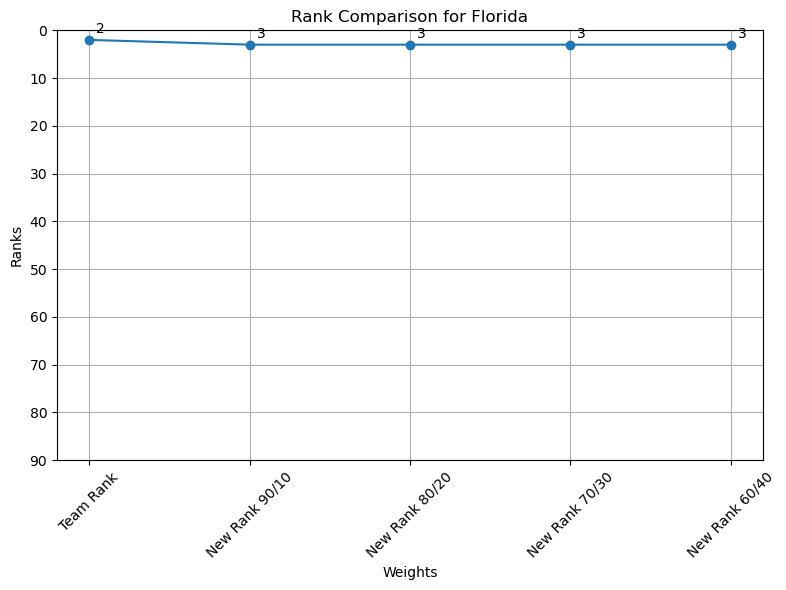

In [34]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Replace 'Your_Team_Name' with the name of the team you want to plot
team_name = 'Florida'

# Filter the DataFrame to get data for the selected team
team_data = new_df4[new_df4['Team'] == team_name]

# Create a list of weights for the x-axis
weights = ['Team Rank', 'New Rank 90/10', 'New Rank 80/20', 'New Rank 70/30', 'New Rank 60/40']

# Extract the ranks for the selected team
team_ranks = team_data['Team Rank'].values[0]
new_ranks_90_10 = team_data['New Rank 90/10'].values[0]
new_ranks_80_20 = team_data['New Rank 80/20'].values[0]
new_ranks_70_30 = team_data['New Rank 70/30'].values[0]
new_ranks_60_40 = team_data['New Rank 60/40'].values[0]

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the ranks for different weights for the selected team
ax.plot(weights, [team_ranks, new_ranks_90_10, new_ranks_80_20, new_ranks_70_30, new_ranks_60_40], marker='o')

# Add labels and title to the plot
ax.set_xlabel('Weights')
ax.set_ylabel('Ranks')
ax.set_title(f"Rank Comparison for {team_name}")
ax.invert_yaxis()
ax.grid(True)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Set the y-axis limits and ticks
ax.set_yticks(range(0, 100, 10))  # Whole numbers by 10 from 1 to 100

# Add labels to each point on the plot
for i, rank in enumerate([team_ranks, new_ranks_90_10, new_ranks_80_20, new_ranks_70_30, new_ranks_60_40]):
    ax.annotate(str(rank), xy=(weights[i], rank), xytext=(5, 5), textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()


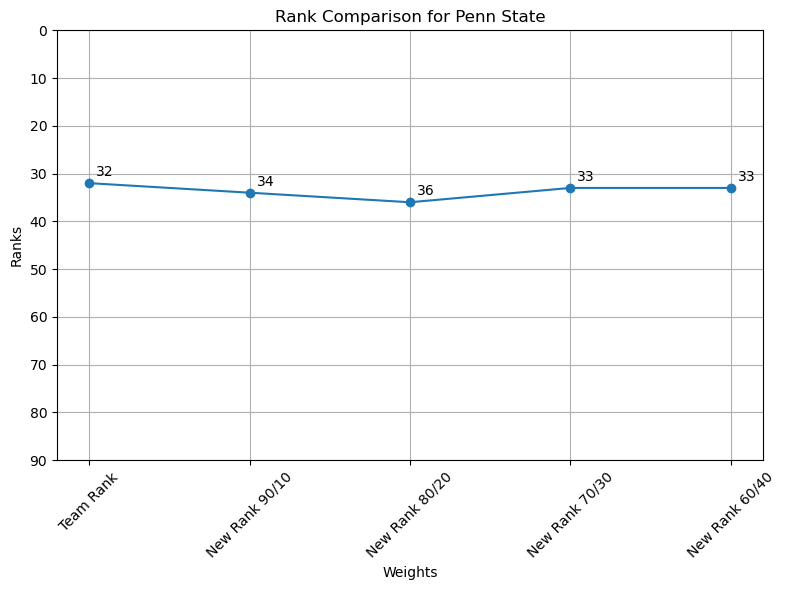

In [35]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Replace 'Your_Team_Name' with the name of the team you want to plot
team_name = 'Penn State'

# Filter the DataFrame to get data for the selected team
team_data = new_df4[new_df4['Team'] == team_name]

# Create a list of weights for the x-axis
weights = ['Team Rank', 'New Rank 90/10', 'New Rank 80/20', 'New Rank 70/30', 'New Rank 60/40']

# Extract the ranks for the selected team
team_ranks = team_data['Team Rank'].values[0]
new_ranks_90_10 = team_data['New Rank 90/10'].values[0]
new_ranks_80_20 = team_data['New Rank 80/20'].values[0]
new_ranks_70_30 = team_data['New Rank 70/30'].values[0]
new_ranks_60_40 = team_data['New Rank 60/40'].values[0]

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the ranks for different weights for the selected team
ax.plot(weights, [team_ranks, new_ranks_90_10, new_ranks_80_20, new_ranks_70_30, new_ranks_60_40], marker='o')

# Add labels and title to the plot
ax.set_xlabel('Weights')
ax.set_ylabel('Ranks')
ax.set_title(f"Rank Comparison for {team_name}")
ax.invert_yaxis()
ax.grid(True)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Set the y-axis limits and ticks
ax.set_yticks(range(0, 100, 10))  # Whole numbers by 10 from 1 to 100

# Add labels to each point on the plot
for i, rank in enumerate([team_ranks, new_ranks_90_10, new_ranks_80_20, new_ranks_70_30, new_ranks_60_40]):
    ax.annotate(str(rank), xy=(weights[i], rank), xytext=(5, 5), textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()


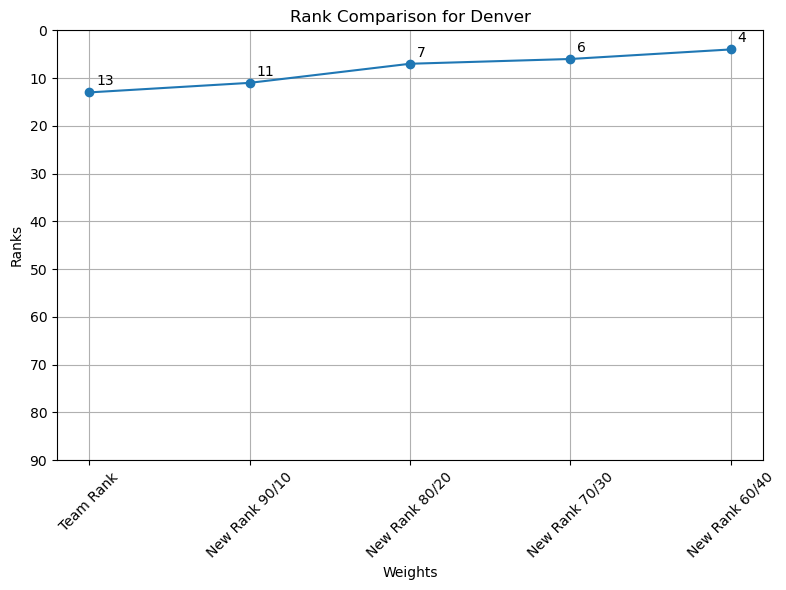

In [35]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Replace 'Your_Team_Name' with the name of the team you want to plot
team_name = 'Denver'

# Filter the DataFrame to get data for the selected team
team_data = new_df4[new_df4['Team'] == team_name]

# Create a list of weights for the x-axis
weights = ['Team Rank', 'New Rank 90/10', 'New Rank 80/20', 'New Rank 70/30', 'New Rank 60/40']

# Extract the ranks for the selected team
team_ranks = team_data['Team Rank'].values[0]
new_ranks_90_10 = team_data['New Rank 90/10'].values[0]
new_ranks_80_20 = team_data['New Rank 80/20'].values[0]
new_ranks_70_30 = team_data['New Rank 70/30'].values[0]
new_ranks_60_40 = team_data['New Rank 60/40'].values[0]

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the ranks for different weights for the selected team
ax.plot(weights, [team_ranks, new_ranks_90_10, new_ranks_80_20, new_ranks_70_30, new_ranks_60_40], marker='o')

# Add labels and title to the plot
ax.set_xlabel('Weights')
ax.set_ylabel('Ranks')
ax.set_title(f"Rank Comparison for {team_name}")
ax.invert_yaxis()
ax.grid(True)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Set the y-axis limits and ticks
ax.set_yticks(range(0, 100, 10))  # Whole numbers by 10 from 1 to 100

# Add labels to each point on the plot
for i, rank in enumerate([team_ranks, new_ranks_90_10, new_ranks_80_20, new_ranks_70_30, new_ranks_60_40]):
    ax.annotate(str(rank), xy=(weights[i], rank), xytext=(5, 5), textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
new_df.to_csv('updated1.csv', index=False)